In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [16]:
data = pd.read_parquet('../data/working_data.parquet')

In [17]:
data

,credit_hist,bankrupt,annual_inc,dti,loan_amnt,int_rate,term_60,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status,grade
0,150,0,55000.000000,5.910000,3600.000000,13.990000,0.0,0,1,0,0,0,0,0.0,C
1,194,0,65000.000000,16.060000,24700.000000,11.990000,0.0,0,1,0,0,0,0,0.0,C
2,186,0,63000.000000,10.780000,20000.000000,10.780000,1.0,0,1,0,0,0,0,0.0,B
3,88,0,110000.000000,17.060000,35000.000000,14.850000,1.0,0,1,0,0,0,0,0.0,C
4,213,0,104433.000000,25.370000,10400.000000,22.450000,1.0,0,1,0,0,0,0,0.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,263,0,227000.000000,12.750000,40000.000000,10.490000,1.0,0,1,0,0,0,0,0.0,B
2260697,210,1,110000.000000,18.300000,24000.000000,14.490000,1.0,0,0,0,0,0,1,1.0,C
2260698,247,0,95000.000000,23.360000,14000.000000,14.490000,1.0,0,1,0,0,0,0,0.0,C
2260699,139,0,77992.428687,18.824196,15046.931228,13.092829,0.0,0,0,0,0,0,0,NaN,None


 # EDA

### Defaults by Grade

Loans rated as "C" show the highest instances of defaults

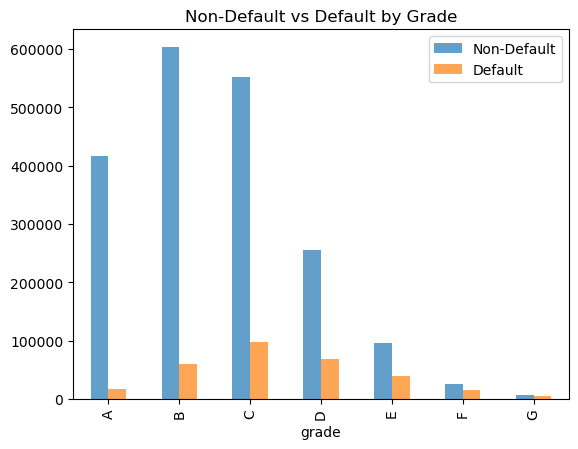

In [18]:
grade_default = pd.crosstab(data['grade'], data['loan_status'])

fig, ax = plt.subplots()

grade_default.plot.bar(legend=True, alpha=0.7, ax=ax)
plt.title("Non-Default vs Default by Grade")
ax.legend(["Non-Default", "Default"])
plt.show()

# Correlation in Credit Features

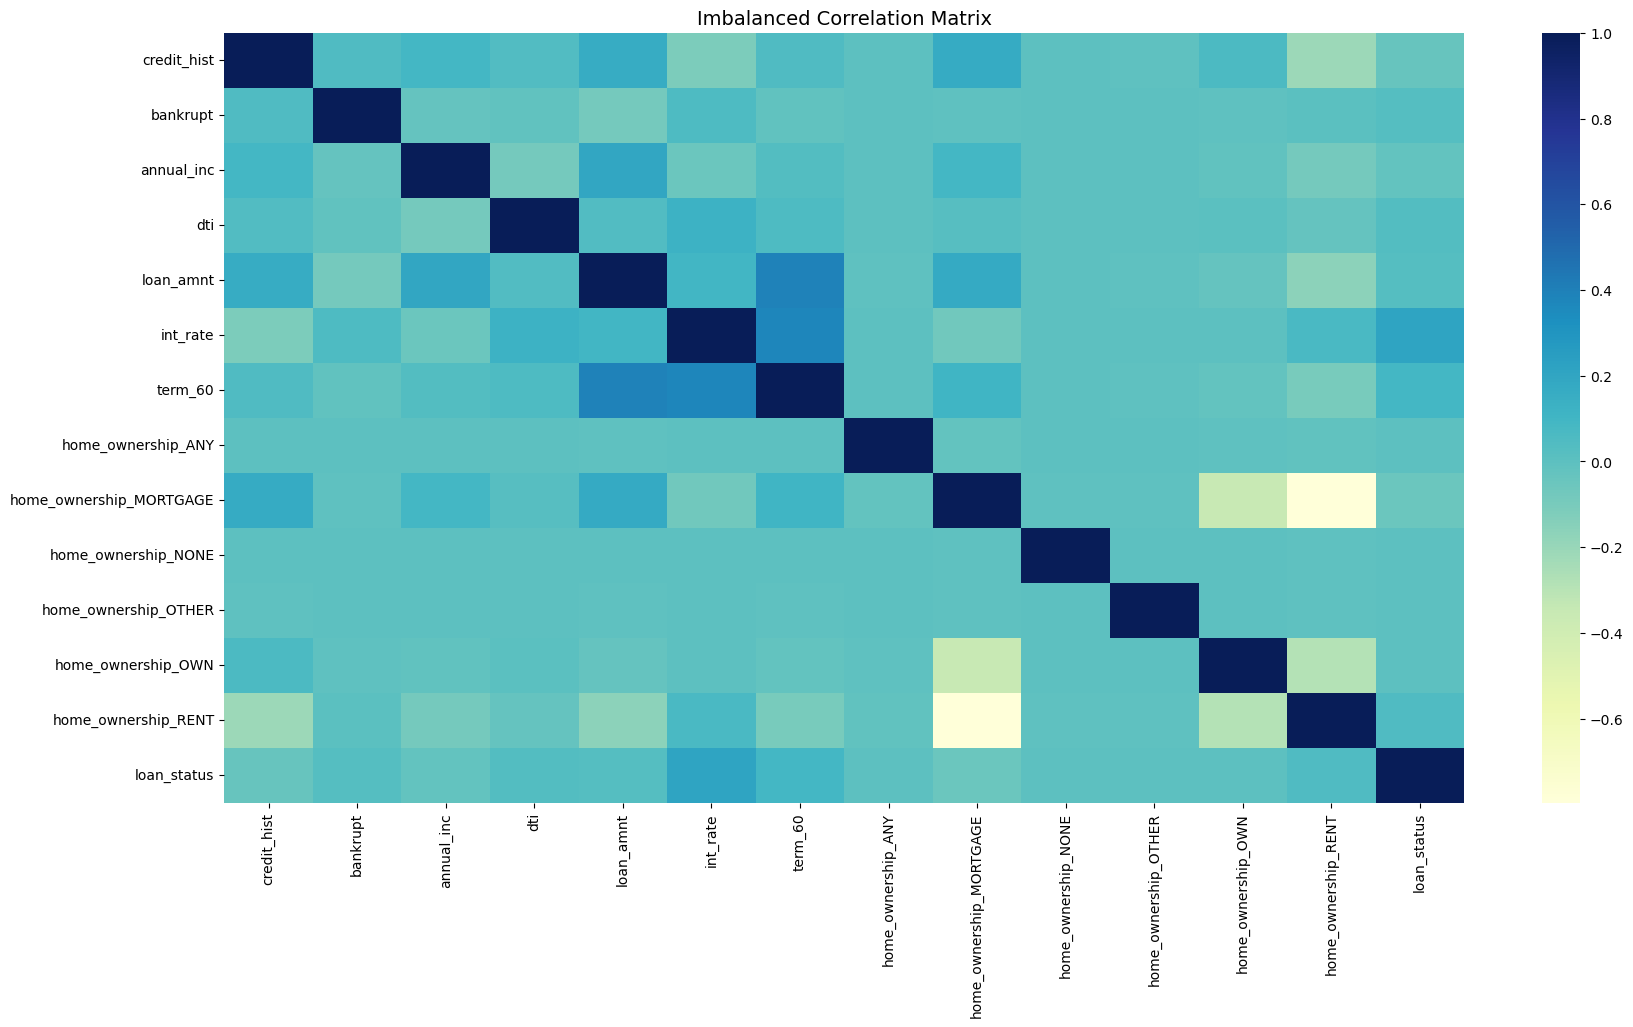

In [19]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Imbalanced DataFrame Correlation
corr = data.drop(['grade'], axis=1).corr()

sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

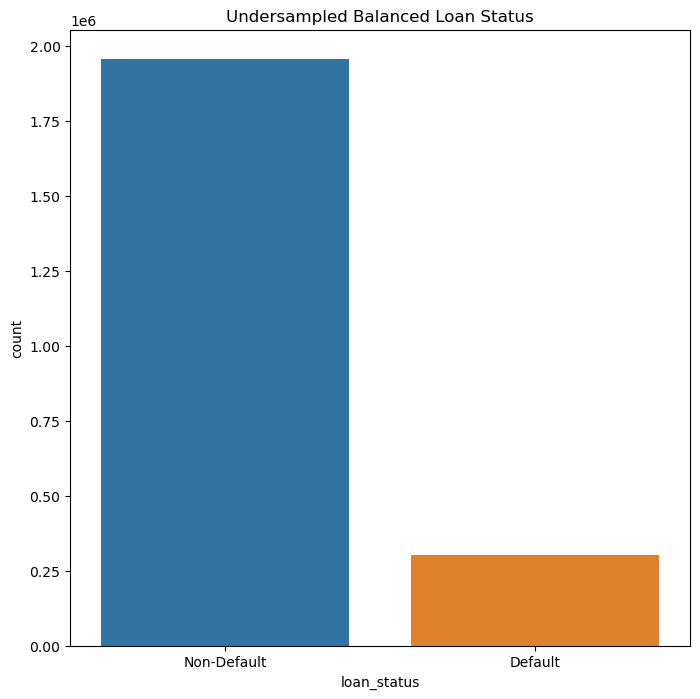

In [25]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(x='loan_status', data=data)
plt.title('Undersampled Balanced Loan Status')
plt.xticks(ticks=(0,1), labels=('Non-Default', 'Default'))
plt.show()

The dataset is imbalanced, and as such we will use an undersampling technique and oversampling technique to get the most accurate model